## Date Manipulation with Sales Data

In [1]:
#importing the basic libraries
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
#read the Sales CSV file
salesdf = pd.read_csv("Sales.Data.csv")

In [3]:
salesdf.head(10)

,S.No.,Order Date,Order Quantity,Sales
0,1,10/13/2010,6,261.5400
1,2,10/01/2012,49,10123.0200
2,3,10/01/2012,27,244.5700
3,4,07/10/2011,30,4965.7595
4,5,8/28/2010,19,394.2700
5,6,8/28/2010,21,146.6900
6,7,6/17/2011,12,93.5400
7,8,6/17/2011,22,905.0800
8,9,3/24/2011,21,2781.8200
9,10,2/26/2010,44,228.4100


In [4]:
#print out the basic info
print(salesdf.shape)
print(salesdf.dtypes)

(8399, 4)
S.No.               int64
Order Date         object
Order Quantity      int64
Sales             float64
dtype: object


In [5]:
#we need to cast the date to the python datetime format
salesdf['Order Date'] = pd.to_datetime(salesdf['Order Date'])
salesdf.dtypes

S.No.                      int64
Order Date        datetime64[ns]
Order Quantity             int64
Sales                    float64
dtype: object

In [6]:
#Let us look athe dates
salesdf['Order Date'].head(10)

0   2010-10-13
1   2012-10-01
2   2012-10-01
3   2011-07-10
4   2010-08-28
5   2010-08-28
6   2011-06-17
7   2011-06-17
8   2011-03-24
9   2010-02-26
Name: Order Date, dtype: datetime64[ns]

In [7]:
#let us extract the different components and put them in different columns (eg for data warehousing)
salesdf['Quarter'] = salesdf['Order Date'].apply(lambda x: x.quarter)
salesdf['Year'] = salesdf['Order Date'].apply(lambda x: x.year)
salesdf['Month'] = salesdf['Order Date'].apply(lambda x: x.month)
salesdf['Week'] = salesdf['Order Date'].apply(lambda x: x.week)
salesdf['Day'] = salesdf['Order Date'].apply(lambda x: x.day)

In [8]:
#here is a list of other things you can extract
#hour, minute, seconds, month in text format

In [9]:
salesdf.head(10)

,S.No.,Order Date,Order Quantity,Sales,Quarter,Year,Month,Week,Day
0,1,2010-10-13,6,261.5400,4,2010,10,41,13
1,2,2012-10-01,49,10123.0200,4,2012,10,40,1
2,3,2012-10-01,27,244.5700,4,2012,10,40,1
3,4,2011-07-10,30,4965.7595,3,2011,7,27,10
4,5,2010-08-28,19,394.2700,3,2010,8,34,28
5,6,2010-08-28,21,146.6900,3,2010,8,34,28
6,7,2011-06-17,12,93.5400,2,2011,6,24,17
7,8,2011-06-17,22,905.0800,2,2011,6,24,17
8,9,2011-03-24,21,2781.8200,1,2011,3,12,24
9,10,2010-02-26,44,228.4100,1,2010,2,8,26


In [10]:
salesdf.dtypes

S.No.                      int64
Order Date        datetime64[ns]
Order Quantity             int64
Sales                    float64
Quarter                    int64
Year                       int64
Month                      int64
Week                       int64
Day                        int64
dtype: object

In [11]:
#we want quarters as strings for OLAP analysis
salesdf['Quarter'] = salesdf['Quarter'].astype(str)
salesdf.dtypes

S.No.                      int64
Order Date        datetime64[ns]
Order Quantity             int64
Sales                    float64
Quarter                   object
Year                       int64
Month                      int64
Week                       int64
Day                        int64
dtype: object

In [12]:
#now replace 1 with Q1, 2 with Q2, 3 with Q3 and 4 with Q4
salesdf['Quarter'] = salesdf['Quarter'].str.replace('1',"Q1")
salesdf['Quarter'] = salesdf['Quarter'].str.replace('2',"Q2")
salesdf['Quarter'] = salesdf['Quarter'].str.replace('3',"Q3")
salesdf['Quarter'] = salesdf['Quarter'].str.replace('4',"Q4")
salesdf['Quarter'].head(10)

0    Q4
1    Q4
2    Q4
3    Q3
4    Q3
5    Q3
6    Q2
7    Q2
8    Q1
9    Q1
Name: Quarter, dtype: object

# Now, let's aggregate like OLAP and plot (we are not using matplotlib so charts will be looking bad)

Quarter          Q1          Q2          Q3          Q4
Sales    3898688.09  3408238.33  3594076.64  4014597.76


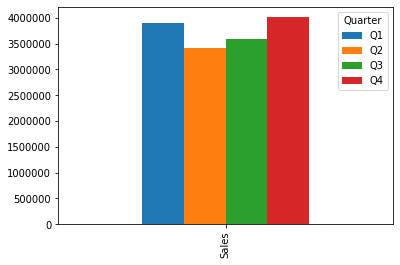

In [13]:
#aggregations
agg_qtr_sales = salesdf.pivot_table(columns=['Quarter'], values='Sales', aggfunc='sum').round(2)
print(agg_qtr_sales)
agg_qtr_sales.plot.bar()

In [14]:
agg_qtr_sales.columns

Index(['Q1', 'Q2', 'Q3', 'Q4'], dtype='object', name='Quarter')

Year         2009       2010       2011        2012
Sales  4209139.46  3549680.8  3436816.7  3719963.86


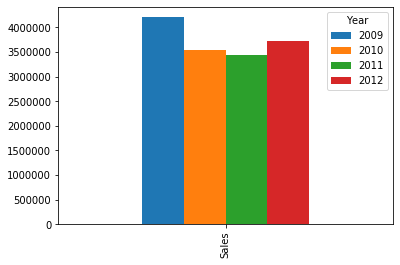

In [15]:
agg_year_sales = salesdf.pivot_table(columns=['Year'], values='Sales', aggfunc='sum').round(2)
print(agg_year_sales)
agg_year_sales.plot.bar()

Month          1           2           3           4           5           6   \
Sales  1444923.38  1180083.78  1273680.93  1216483.44  1160896.38  1030858.51   

Month          7           8           9           10          11          12  
Sales  1141104.35  1115015.33  1337956.96  1383714.43  1163393.37  1467489.96  


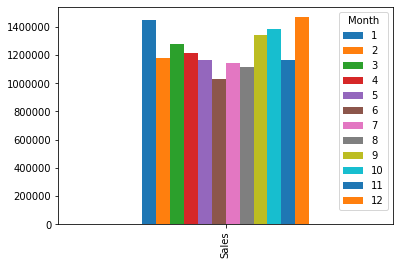

In [16]:
agg_month_sales = salesdf.pivot_table(columns=['Month'], values='Sales', aggfunc='sum').round(2)
print(agg_month_sales)
agg_month_sales.plot.bar()

Week          1          2          3          4          5          6   \
Sales  309442.97  453098.37  233692.35  269561.72  301772.25  306868.05   

Week          7          8          9          10  ...        44         45  \
Sales  309767.26  257349.75  295048.98  229005.21  ...  208535.5  294600.45   

Week          46         47         48        49         50        51  \
Sales  282626.33  299441.77  384229.25  349161.0  296638.14  315662.3   

Week          52         53  
Sales  242937.17  123756.24  

[1 rows x 53 columns]


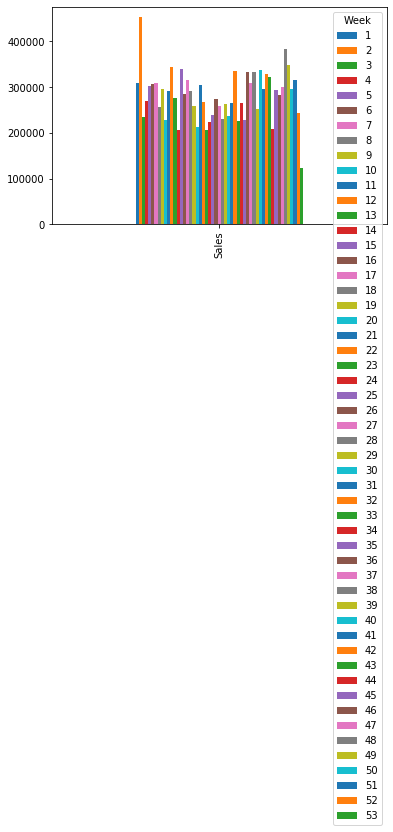

In [17]:
agg_week_sales = salesdf.pivot_table(columns=['Week'], values='Sales', aggfunc='sum').round(2)
print(agg_week_sales)
agg_week_sales.plot.bar()

## Date Manipulation with Orders Data

In [18]:
#read the Orders CSV file
ordersdf = pd.read_csv("Orders.Data.csv")

#print out the basic info
print(ordersdf.shape)
print(ordersdf.dtypes)

(99441, 8)
order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object


In [19]:
#there are different dates regarding the ordering and delivery of a product
#what if I want to find out the average timespan between order and delivery?
ordersdf.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


In [20]:
#all dates are objects so we have to convert them to datetime objects
#lets change the column names first
ordersdf = ordersdf.rename(columns = {"order_purchase_timestamp": "Purchased_At",
                         "order_approved_at":"Approved_At",
                         "order_delivered_carrier_date": "Delivered_to_Carrier_On",
                         "order_delivered_customer_date": "Delivered_to_Customer_On",
                         "order_estimated_delivery_date": "Estimated_Delivery_On"}) 
ordersdf.head(10)


,order_id,customer_id,order_status,Purchased_At,Approved_At,Delivered_to_Carrier_On,Delivered_to_Customer_On,Estimated_Delivery_On
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


In [21]:
#lets have only the relevant columns for the time being
ordersdf = ordersdf[['Purchased_At', 'Approved_At', 'Delivered_to_Carrier_On', 'Delivered_to_Customer_On', 'Estimated_Delivery_On']]
ordersdf.head(10)

,Purchased_At,Approved_At,Delivered_to_Carrier_On,Delivered_to_Customer_On,Estimated_Delivery_On
0,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


In [22]:
#lets typecast to datetime
ordersdf['Purchased_At'] = pd.to_datetime(ordersdf['Purchased_At'])
ordersdf['Approved_At'] = pd.to_datetime(ordersdf['Approved_At'])
ordersdf['Delivered_to_Carrier_On'] = pd.to_datetime(ordersdf['Delivered_to_Carrier_On'])
ordersdf['Delivered_to_Customer_On'] = pd.to_datetime(ordersdf['Delivered_to_Customer_On'])
ordersdf['Estimated_Delivery_On'] = pd.to_datetime(ordersdf['Estimated_Delivery_On'])
ordersdf.dtypes

Purchased_At                datetime64[ns]
Approved_At                 datetime64[ns]
Delivered_to_Carrier_On     datetime64[ns]
Delivered_to_Customer_On    datetime64[ns]
Estimated_Delivery_On       datetime64[ns]
dtype: object

In [23]:
#lets see some rows
ordersdf.head(10)

,Purchased_At,Approved_At,Delivered_to_Carrier_On,Delivered_to_Customer_On,Estimated_Delivery_On
0,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
5,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01
6,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
7,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07
8,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06
9,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23


In [24]:
#what is the average difference between order time and approval time
between_order_approval = ordersdf['Approved_At'] - ordersdf['Purchased_At']

In [25]:
between_order_approval.apply(lambda x: (x.total_seconds())/3600).mean()

#whoa... 10 hours is the average time between order and approval.. this seems a bit too much
#we will dig this later

10.419094301919714

In [26]:
#what is the average difference between expected delivery time and actual customer delivery time
#assuming that the orders are being delivered later than the estimated date....
between_estimated_actual = ordersdf['Delivered_to_Customer_On']-ordersdf['Estimated_Delivery_On']
between_estimated_actual.apply(lambda x: (x.total_seconds())/3600).mean()

#so, -268 hours means that the orders are being delivered 268 hours (or 11 days before, on the average)
#this also seems too good; we need to drill down (or maybe taking averages in this way is not the best analysis)

-268.2988771156704

In [27]:
#what is the average difference between approval and actual delivery
#assuming that the orders are being delivered later than the estimated date....
between_approved_actual = ordersdf['Delivered_to_Customer_On']-ordersdf['Approved_At']
between_approved_actual.apply(lambda x: (x.total_seconds())/3600).mean()

#so it takes 291 hours or 12 days on the average from approval to delivery. this seems reasonable.

291.12857102624093

In [28]:
#let's see the figures between order and approval
timediffseries = between_order_approval.apply(lambda x: (x.total_seconds())/3600)
timediffseries

0         0.178333
1        30.713889
2         0.276111
3         0.298056
4         1.030556
           ...    
99436     0.000000
99437     0.194167
99438     0.292500
99439     0.131667
99440    14.382778
Length: 99441, dtype: float64

In [29]:
newdf = pd.DataFrame(timediffseries,index = np.arange(len(timediffseries)),columns=['TimeDiff'])

In [30]:
newdf.head(100)

,TimeDiff
0,0.178333
1,30.713889
2,0.276111
3,0.298056
4,1.030556
...,...
95,0.532500
96,0.280833
97,0.241111
98,0.243056


In [31]:
print(newdf.shape)
print(newdf.mean())

#the following shows that in 30% rows, time difference is greater than 5 minutes
print((((newdf.where(newdf['TimeDiff']>5).count())/99441)*100))

#the following shows that in 28% rows, time difference is greater than 10 minutes
print((((newdf.where(newdf['TimeDiff']>10).count())/99441)*100))

#the following shows that in 5% rows, time difference is greater than 50 minutes
print((((newdf.where(newdf['TimeDiff']>50).count())/99441)*100))

#the following shows that in 1% rows, time difference is greater than 90 minutes
print((((newdf.where(newdf['TimeDiff']>90).count())/99441)*100))



(99441, 1)
TimeDiff    10.419094
dtype: float64
TimeDiff    30.329542
dtype: float64
TimeDiff    28.217737
dtype: float64
TimeDiff    4.759606
dtype: float64
TimeDiff    1.013666
dtype: float64


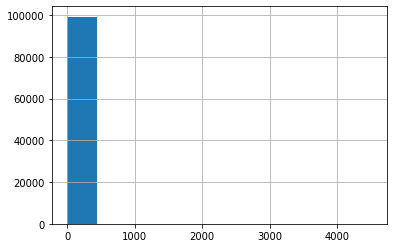

In [32]:
#so there are outliers.... let's plot the histogram
newdf['TimeDiff'].hist()

#from this histogram, we can sense some outliers...

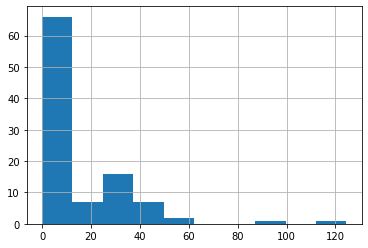

In [33]:
#to confirm lets plot the first 100 rows histogram
newdf['TimeDiff'].head(100).hist()

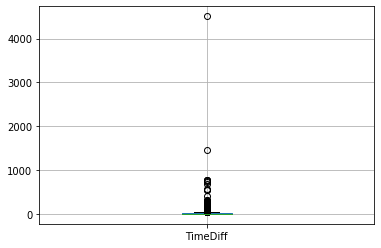

In [34]:
#lets see the boxplot to confirm
newdf.boxplot(column='TimeDiff', sym='o', return_type='axes')

In [35]:
#so we have two points, one where TimeDiff>1000 and one >4000
#lets see those rows
newdf[newdf['TimeDiff']>1000]

,TimeDiff
47552,4509.180556
62293,1450.866389


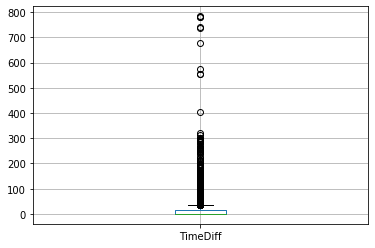

In [36]:
#lets skip them and see the boxplot
subset = newdf[(newdf.index != 47552) & (newdf.index != 62293)]
subset.count()

subset.boxplot(column='TimeDiff', sym='o', return_type='axes')
#still we see that there are problems...ie some orders are taking too long for approval..

TimeDiff    98627
dtype: int64


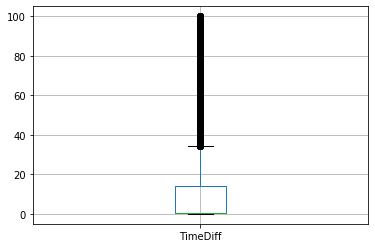

In [37]:
subset = newdf[newdf['TimeDiff']<100]
print(subset.count())

subset.boxplot(column='TimeDiff', sym='o', return_type='axes')

TimeDiff    91969
dtype: int64


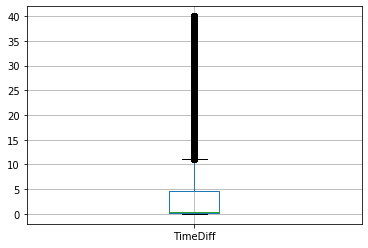

In [38]:
#lets do it once more with 40
subset = newdf[newdf['TimeDiff']<40]
print(subset.count())

subset.boxplot(column='TimeDiff', sym='o', return_type='axes')

TimeDiff    63424
dtype: int64


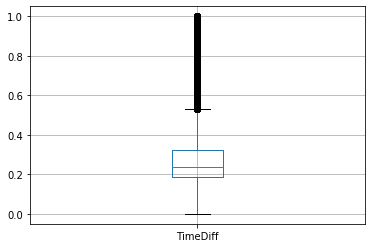

In [39]:
#lets do it once more with 40
subset = newdf[newdf['TimeDiff']<1]
print(subset.count())

subset.boxplot(column='TimeDiff', sym='o', return_type='axes')

In [40]:
#let us try to find out how many rows are above 40
subset = newdf[newdf['TimeDiff']>40]
print(subset.count())

#so these all can be considered as sort of outliers.. but the way the orders are being processed needs to be drilled down
#i guess this has to do with different products.

TimeDiff    7312
dtype: int64


In [42]:
Q1 = newdf['TimeDiff'].quantile(0.25)
Q3 = newdf['TimeDiff'].quantile(0.75)
IQR = Q3- Q1
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (Q1, Q3, IQR))

Percentiles: 25th=0.215, 75th=14.581, IQR=14.366


TimeDiff    24735
dtype: int64


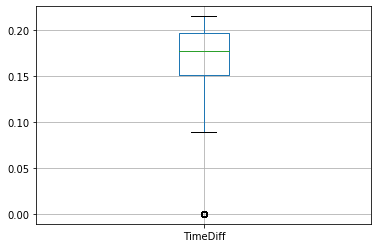

In [52]:
#let us try to find out how many rows are above below
subset = newdf[newdf['TimeDiff']<0.215]
print(subset.count())

subset.boxplot(column='TimeDiff', sym='o', return_type='axes')

The above is the best solution box plot which comes under Q1.